## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. 
The project pipeline can be divided into below stages-
- Data Understanding
- Exploratory data analytics (EDA)
- Train/Test split
- Model building / hyperparameter tuning
- Model evaluation

Since the dataset is imbalanced we also use different balancing tecniques to generate the dataset
1. Random Oversampling
2. SMOTE
3. ADASYN

### Import the libraries

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

import warnings
warnings.filterwarnings("ignore")

## Exploratory data analysis

In [2]:
# fetch data from csv file 
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# check the shape of dataset
df.shape

(284807, 31)

In [4]:
#observe the different feature type present in the data
print(df.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [5]:
# information of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Here we will observe the distribution of our classes

In [6]:
classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100,2)
fraud_share=round(classes[1]/df['Class'].count()*100,2)
print("Normal transactions: ",normal_share)
print("Fraud transactions:",fraud_share)

Normal transactions:  99.83
Fraud transactions: 0.17


In [7]:
# Count of normal vs fraud transactions
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

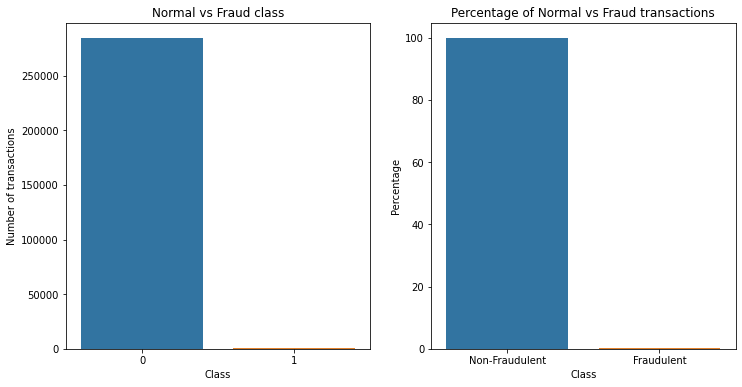

In [8]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(df["Class"])
plt.xlabel("Class")
plt.ylabel("Number of transactions")
plt.title("Normal vs Fraud class")


plt.subplot(1,2,2)
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title("Percentage of Normal vs Fraud transactions")
plt.show()


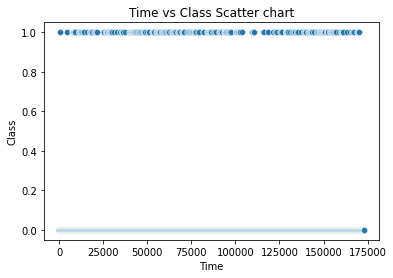

In [9]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(df["Time"],df["Class"])
plt.title("Time vs Class Scatter chart")
plt.show()

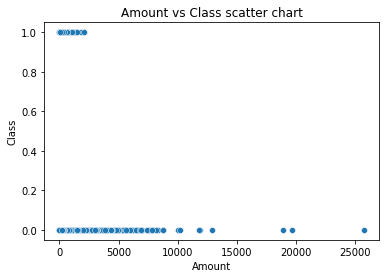

In [10]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(df["Amount"],df["Class"])
plt.title("Amount vs Class scatter chart")
plt.show()

In [11]:
# Drop unnecessary columns
df = df.drop("Time",axis=1)

### Splitting the data into train & test data

In [12]:
y=df["Class"]
X=df.drop("Class",axis=1)

In [13]:
# split dataset into 80:20 ratio
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [14]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


### Plotting the distribution of a variable

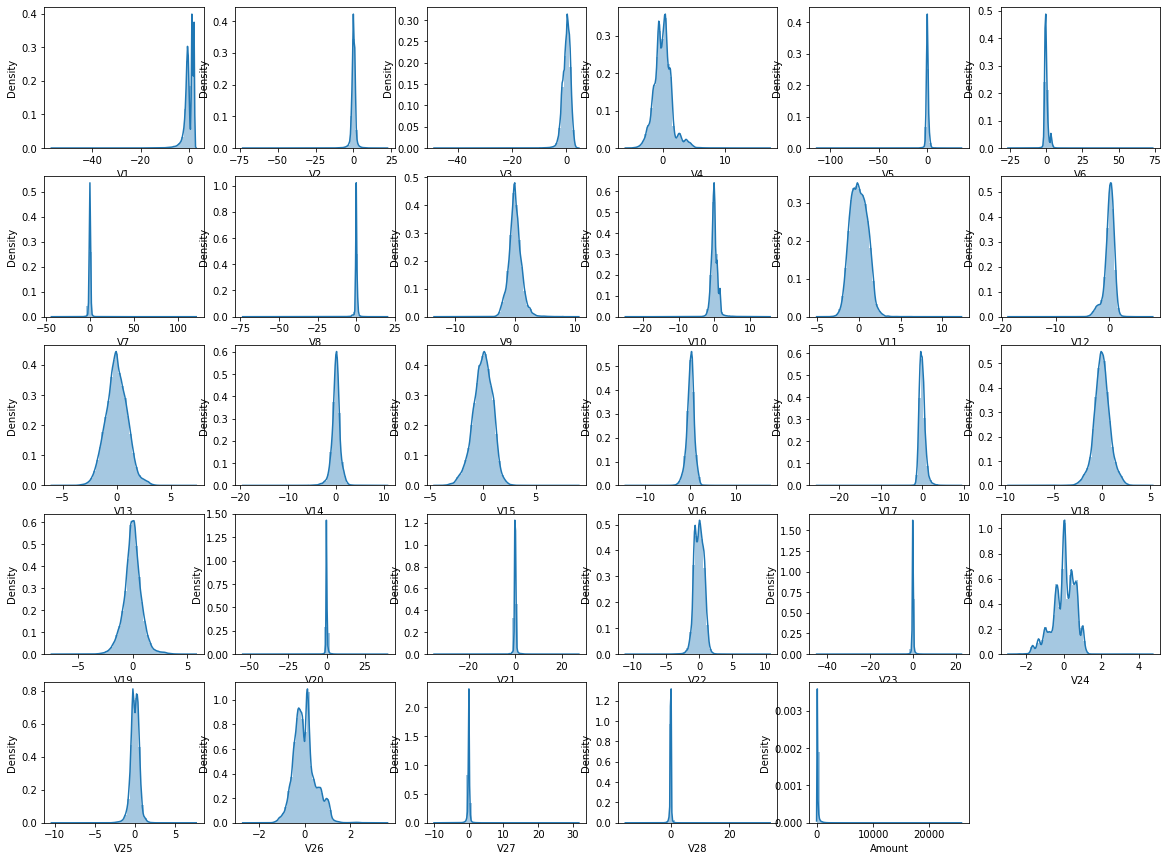

In [15]:
# plot the histogram of a variable from the dataset to see the skewness
var = X_train.columns

plt.figure(figsize=(20,15))
i=0
for col in var:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()

In [16]:
# Scale the amount column using Standard Scaler 
scaler = StandardScaler()

X_train[['Amount']] = scaler.fit_transform(X_train[["Amount"]])

X_test[["Amount"]] = scaler.fit_transform(X_test[["Amount"]])

In [17]:
# display the training data after scaling
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
223361,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,...,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,-0.307889
165061,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,...,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,-0.167026
238186,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,...,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,-0.300043
150562,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,...,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,0.113600
138452,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,...,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,-0.246029


In [18]:
# display the test data after scaling
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,...,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1.202228
49906,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,...,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,1.880554
29474,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,...,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,-0.247213
276481,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,...,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.375544
278846,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,...,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.378198


### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [19]:
# check for skewness of the features
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp_skew = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp_skew.set_index("Features", inplace=True)
tmp_skew.T

Features,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Skewness,-3.320269,-4.826847,-2.219375,0.677776,-2.928646,1.977725,3.74462,-8.445014,0.543603,1.212102,...,-1.977859,3.656863,-0.230008,-6.285467,-0.552668,-0.417168,0.579265,-0.03833,11.776522,18.352356


In [20]:
# Filter the features which have skewness less than -1 and greater than +1
skewed = tmp_skew.loc[(tmp_skew["Skewness"] > 1) | (tmp_skew["Skewness"] <-1 )].index
print(skewed)

Index(['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16',
       'V17', 'V20', 'V21', 'V23', 'V28', 'Amount'],
      dtype='object', name='Features')


In [21]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

pt = PowerTransformer(copy=False)

X_train[skewed]=pt.fit_transform(X_train[skewed])

X_test[skewed]=pt.fit_transform(X_test[skewed])

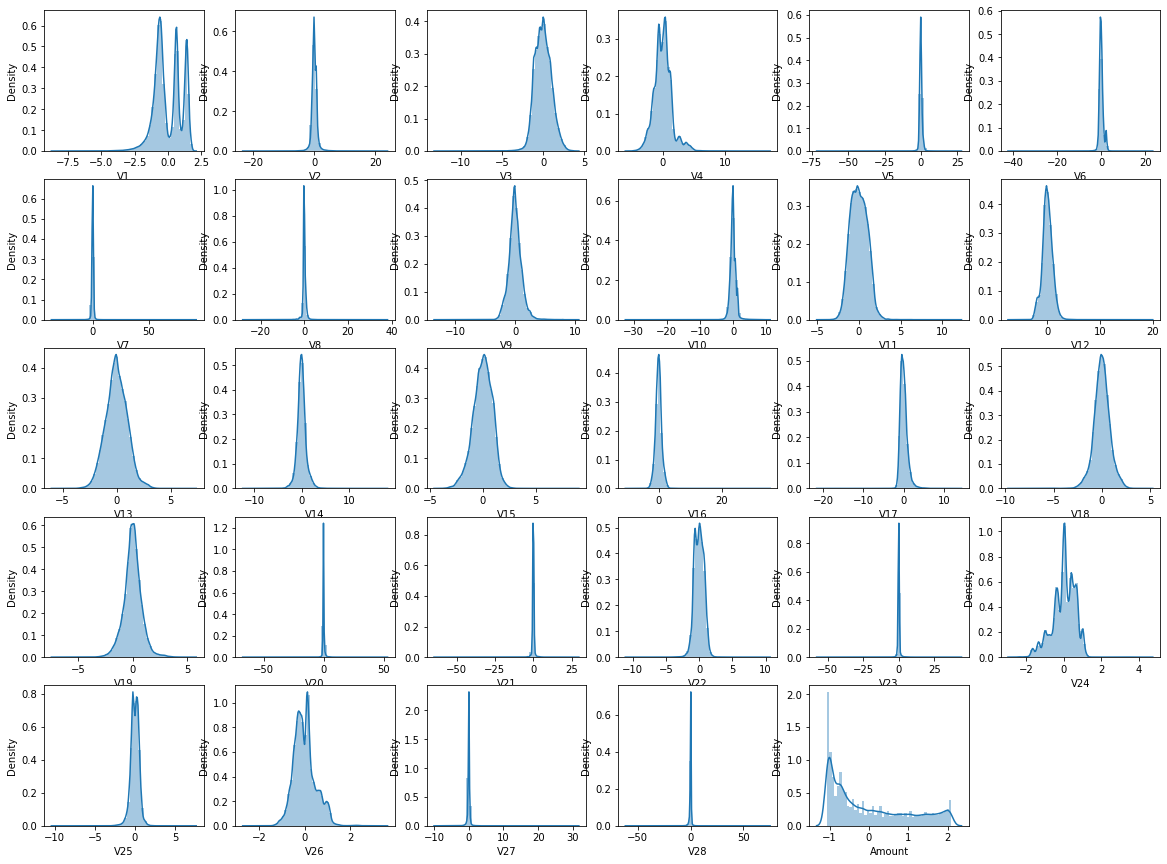

In [22]:
# plot the histogram of a variable from the dataset again to see the result 

var = X_train.columns

plt.figure(figsize=(20,15))
i=0
for col in var:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

### 1. Logistic Regression

In [23]:
# Logistic Regression
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
folds = KFold(n_splits=5, shuffle=True, random_state=4)

#perform cross validation
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True)
#perform hyperparameter tuning
model_cv.fit(X_train, y_train)

#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9808868419804181
Best hyperparameters:  {'C': 0.01}


In [24]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.657695,0.187732,0.060999,0.011576,0.01,{'C': 0.01},0.968649,0.987418,0.991888,0.972320,...,0.980887,0.008917,1,0.986560,0.981838,0.980641,0.986508,0.981480,0.983405,0.002584
1,4.239098,0.605626,0.048908,0.005152,0.1,{'C': 0.1},0.969796,0.982755,0.988625,0.964694,...,0.977179,0.008725,2,0.983257,0.978596,0.977881,0.985034,0.979206,0.980795,0.002824
2,5.244300,0.579267,0.048211,0.004008,1,{'C': 1},0.970928,0.981696,0.987179,0.962764,...,0.976174,0.008526,3,0.982013,0.977514,0.977196,0.984493,0.978452,0.979934,0.002851
3,4.902895,0.565626,0.048104,0.005331,10,{'C': 10},0.971130,0.981564,0.986990,0.962537,...,0.976060,0.008497,4,0.981847,0.977373,0.977123,0.984424,0.978355,0.979824,0.002854
4,5.048086,0.773606,0.042397,0.005351,100,{'C': 100},0.971157,0.981549,0.986970,0.962509,...,0.976049,0.008495,5,0.981831,0.977356,0.977118,0.984419,0.978347,0.979814,0.002854
5,3.931693,0.260341,0.024999,0.003742,1000,{'C': 1000},0.971160,0.981549,0.986968,0.962506,...,0.976048,0.008495,6,0.981829,0.977357,0.977117,0.984418,0.978345,0.979813,0.002854


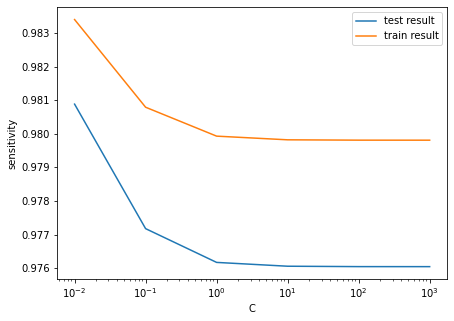

In [25]:
# plot C vs train and validation scores
plt.figure(figsize=(7, 5))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper right')
plt.xscale('log')

In [26]:
# building the model with best C
lr_imb_model = LogisticRegression(C=0.01)

# Fitting the model on train dataset
lr_imb_model.fit(X_train, y_train)

LogisticRegression(C=0.01)

In [27]:
# Creating utility function to display ROC-AUC score, f1 score and classification report
def display_scores(y_test, y_pred):
    '''Display ROC-AUC score, f1 score and classification report of a model'''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

In [28]:
# predictions on the training dataset
y_train_pred = lr_imb_model.predict(X_train)

In [29]:
display_scores(y_train,y_train_pred)

F1 Score: 73.76%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.90      0.62      0.74       394

    accuracy                           1.00    227845
   macro avg       0.95      0.81      0.87    227845
weighted avg       1.00      1.00      1.00    227845



In [30]:
# ROC Curve utility function
def plot_roc(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs,drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR or [1 - True Negative Rate]')
    plt.ylabel('TPR')
    plt.title('ROC example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [31]:
# Predicted probability
y_train_pred_proba = lr_imb_model.predict_proba(X_train)[:,1]

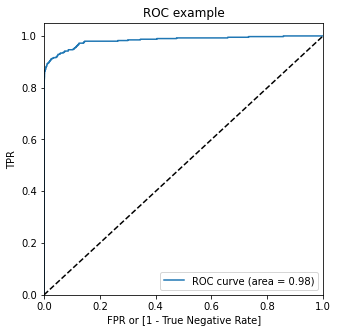

In [32]:
# Plot the ROC curve
plot_roc(y_train, y_train_pred_proba)

In [33]:
# predictions on the test set
y_test_pred = lr_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 71.08%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.60      0.71        98

    accuracy                           1.00     56962
   macro avg       0.93      0.80      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [34]:
# Predicted probability
y_test_pred_proba = lr_imb_model.predict_proba(X_test)[:,1]

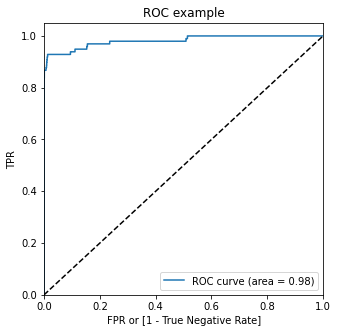

In [35]:
# Plot the ROC curve
plot_roc(y_test, y_test_pred_proba)

#### Model Summary

- Training dataset
    - ROC : 98%
    - F1 Score: 73.76%
    
- Test dataset
    - ROC : 98%
    - F1 score: 71.08%

### 2. KNN

In [36]:
# KNN model
# knn = KNeighborsClassifier()

# k_range = list(range(1, 31))
# param_grid = dict(n_neighbors=k_range)

# model_cv = GridSearchCV(knn, 
#                         param_grid, 
#                         cv=10, 
#                         scoring='roc_auc', 
#                         return_train_score=True,
#                         verbose=1)

# model_cv.fit(X_train, y_train)

# #print the evaluation result by choosing a evaluation metric
# print('Best ROC AUC score: ', model_cv.best_score_)

# #print the optimum value of hyperparameters
# print('Best hyperparameters: ', model_cv.best_params_)

After building the model using **KNN** understood that it takes lot of time to train the model. With increased of data after balancing the whole dataset it will certainly take more time so **KNN** and **SVM** are not best models to train the huge data.

### 3. Decision Tree

In [37]:
%%time
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 20, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Wall time: 48.2 s


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 20, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [38]:
# Print the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9340093036874292
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


In [39]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,6.164465,0.090626,0.046667,0.001247,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.912624,0.927341,0.951700,0.930555,0.016114,5
1,6.110471,0.071737,0.047506,0.001777,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.912640,0.927341,0.951702,0.930561,0.016109,4
2,6.323816,0.246759,0.056667,0.008731,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.922268,0.927130,0.952111,0.933836,0.013073,2
3,6.496481,0.053325,0.047001,0.000002,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.922268,0.927130,0.952111,0.933836,0.013073,2
4,11.863573,0.198405,0.051334,0.002055,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.934874,0.916390,0.908220,0.919828,0.011150,10
5,11.959078,0.110808,0.050666,0.002495,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.934902,0.916413,0.908223,0.919846,0.011159,9
6,12.154758,0.319332,0.053666,0.003092,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.963236,0.930643,0.908149,0.934009,0.022615,1
7,12.645635,0.079735,0.053839,0.003657,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.948474,0.930676,0.908156,0.929102,0.016497,6
8,17.710464,0.345296,0.044667,0.005186,15,50,50,"{'max_depth': 15, 'min_samples_leaf': 50, 'min...",0.899865,0.907578,0.901314,0.902919,0.003347,11
9,18.078487,0.795646,0.046669,0.009670,15,50,100,"{'max_depth': 15, 'min_samples_leaf': 50, 'min...",0.899883,0.903596,0.901299,0.901593,0.001530,12


In [40]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

In [41]:
y_train_pred = dt_imb_model.predict(X_train)
display_scores(y_train, y_train_pred)

F1 Score: 72.33%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.77      0.68      0.72       394

    accuracy                           1.00    227845
   macro avg       0.89      0.84      0.86    227845
weighted avg       1.00      1.00      1.00    227845



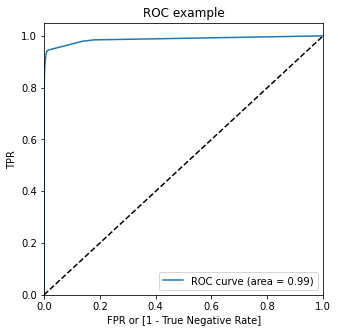

In [42]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
plot_roc(y_train, y_train_pred_proba)

In [43]:
y_test_pred = dt_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 72.45%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.72      0.72      0.72        98

    accuracy                           1.00     56962
   macro avg       0.86      0.86      0.86     56962
weighted avg       1.00      1.00      1.00     56962



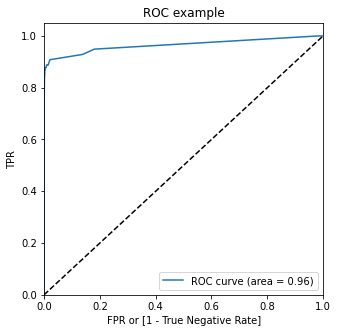

In [44]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
plot_roc(y_test, y_test_pred_proba)

#### Model Summary

- Train set
    - ROC Score: 99%
    - F1 score : 72.33%
    
- Test set
    - ROC Score: 96%
    - F1 score : 72.45%

### 4. Random Forest

In [45]:
%%time
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6],
    'criterion' :['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=rfc, 
                      param_grid=param_grid,
                      scoring= 'roc_auc',
                      cv= 5,
                      n_jobs=-1,
                      verbose = 1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Wall time: 31min 55s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6], 'n_estimators': [200, 500]},
             scoring='roc_auc', verbose=1)

In [46]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9800577677413497
RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=500,
                       random_state=42)


In [47]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,134.385994,1.212181,0.572005,0.010201,gini,4,200,"{'criterion': 'gini', 'max_depth': 4, 'n_estim...",0.956419,0.939141,0.947621,0.970667,0.967810,0.956332,0.011905,12
1,299.178275,1.530608,1.382927,0.022741,gini,4,500,"{'criterion': 'gini', 'max_depth': 4, 'n_estim...",0.962982,0.942266,0.952946,0.972443,0.967607,0.959649,0.010819,11
2,147.061222,12.850241,0.615002,0.015270,gini,5,200,"{'criterion': 'gini', 'max_depth': 5, 'n_estim...",0.969512,0.955269,0.958048,0.978927,0.964198,0.965191,0.008460,10
3,341.198670,4.031493,1.496619,0.040519,gini,5,500,"{'criterion': 'gini', 'max_depth': 5, 'n_estim...",0.970981,0.954330,0.964675,0.975107,0.965336,0.966086,0.007016,9
4,164.181968,1.224123,0.669001,0.007950,gini,6,200,"{'criterion': 'gini', 'max_depth': 6, 'n_estim...",0.976113,0.954711,0.971171,0.970971,0.967416,0.968076,0.007233,8
5,399.048645,3.624821,1.569020,0.020537,gini,6,500,"{'criterion': 'gini', 'max_depth': 6, 'n_estim...",0.977377,0.961896,0.967103,0.980592,0.966439,0.970682,0.007086,7
6,155.861209,2.231687,0.599903,0.016155,entropy,4,200,"{'criterion': 'entropy', 'max_depth': 4, 'n_es...",0.982104,0.975884,0.964972,0.985839,0.968328,0.975425,0.007911,5
7,388.419212,3.091171,1.445728,0.055656,entropy,4,500,"{'criterion': 'entropy', 'max_depth': 4, 'n_es...",0.982297,0.972386,0.965056,0.986938,0.967961,0.974928,0.008379,6
8,191.592916,1.501180,0.666508,0.016397,entropy,5,200,"{'criterion': 'entropy', 'max_depth': 5, 'n_es...",0.984675,0.981208,0.973528,0.989002,0.971393,0.979961,0.006638,2
9,466.170657,6.843042,1.262631,0.206020,entropy,5,500,"{'criterion': 'entropy', 'max_depth': 5, 'n_es...",0.985076,0.979185,0.971572,0.989083,0.971957,0.979375,0.006967,4


In [48]:
# Model with optimal hyperparameters
rfc_imb_model = RandomForestClassifier(criterion = "entropy", 
                                  random_state = 42,
                                  max_depth=6, 
                                  n_estimators=500)

rfc_imb_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=500,
                       random_state=42)

In [49]:
y_train_pred = rfc_imb_model.predict(X_train)
display_scores(y_train, y_train_pred)

F1 Score: 87.69%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.96      0.80      0.88       394

    accuracy                           1.00    227845
   macro avg       0.98      0.90      0.94    227845
weighted avg       1.00      1.00      1.00    227845



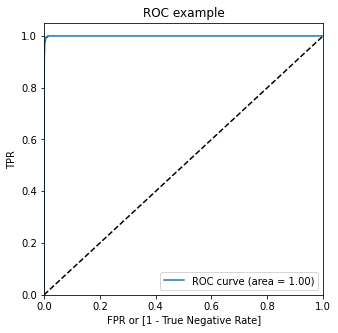

In [50]:
# Predicted probability
y_train_pred_proba = rfc_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
plot_roc(y_train, y_train_pred_proba)

In [51]:
y_test_pred = rfc_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 84.57%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



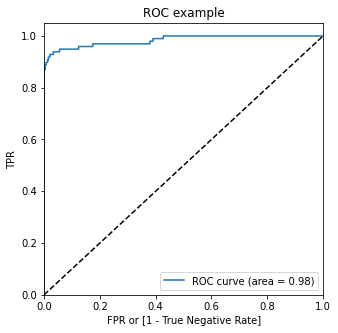

In [52]:
# Predicted probability
y_test_pred_proba = rfc_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
plot_roc(y_test, y_test_pred_proba)

#### Model Summary

- Training set
    - ROC Score: 100%
    - F1 score : 87.69%
    
- Test set
    - ROC Score: 98%
    - F1 score : 84.57%

**Random Forest** algorithm takes more time to run. The time would increase with addtional data generated after balancing the dataset so we do not recommend to use bagging algorithms.

### 5. XGBoost

In [53]:
%%time
# creating a K-Fold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9],
             }          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200,eval_metric='logloss',tree_method = "hist") # using tree_method='hist' to run XGB faster, with this the model runs 7 times faster. we also get same results with this method

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,                        
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Wall time: 25.3 s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
             

In [54]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9839174411133892
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='hist', validate_parameters=1, verbosity=None)


In [55]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.599849,0.847631,0.037666,0.002356,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.974498,0.975229,0.989950,0.979892,0.007118,3,0.999808,0.999766,0.999677,0.999750,0.000055
1,1.022179,0.006648,0.041334,0.001699,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.980271,0.983381,0.988100,0.983917,0.003218,1,0.999798,0.999937,0.999851,0.999862,0.000057
2,1.042672,0.014736,0.041000,0.002944,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.980515,0.977638,0.989449,0.982534,0.005029,2,0.999869,0.999852,0.999768,0.999830,0.000044
3,1.060674,0.007400,0.041999,0.000816,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.972046,0.953585,0.983050,0.969560,0.012157,6,0.999981,0.999962,0.999934,0.999959,0.000019
4,1.141178,0.017154,0.040836,0.004876,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.978259,0.970181,0.978930,0.975790,0.003976,5,1.000000,1.000000,1.000000,1.000000,0.000000
5,1.165343,0.054863,0.043000,0.000818,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.977028,0.970605,0.984156,0.977263,0.005535,4,1.000000,1.000000,1.000000,1.000000,0.000000


In [56]:
# Printing best params

model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.6}

In [57]:
%%time
# Model with optimal hyperparameters
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
          'objective':'binary:logistic',
          'eval_metric':'logloss'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params,tree_method = "hist")
xgb_imb_model.fit(X_train, y_train)

[10:57:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:57:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 970 ms


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1,
              params={'eval_metric': 'logloss', 'learning_rate': 0.2,
                      'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='hist',
              validate_parameters=1, verbosity=None)

In [58]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

display_scores(y_train, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



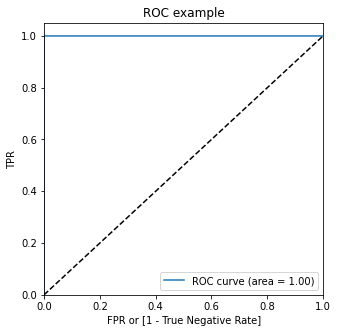

In [59]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
plot_roc(y_train, y_train_pred_proba_imb_xgb)

In [60]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 87.64%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.80      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



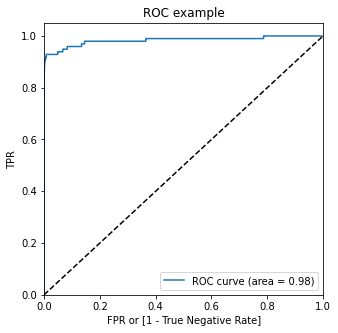

In [61]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
plot_roc(y_test, y_test_pred_proba)

#### Model Summary

- Train set
    - ROC score: 100%
    - F1 score: 100.0%
- Test set
    - ROC score: 98%
    - F1 score: 87.64%

##### XGBoost gives the best results among the 4-5 models above for unbalanced dataset

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 7
3rd Top var = 10


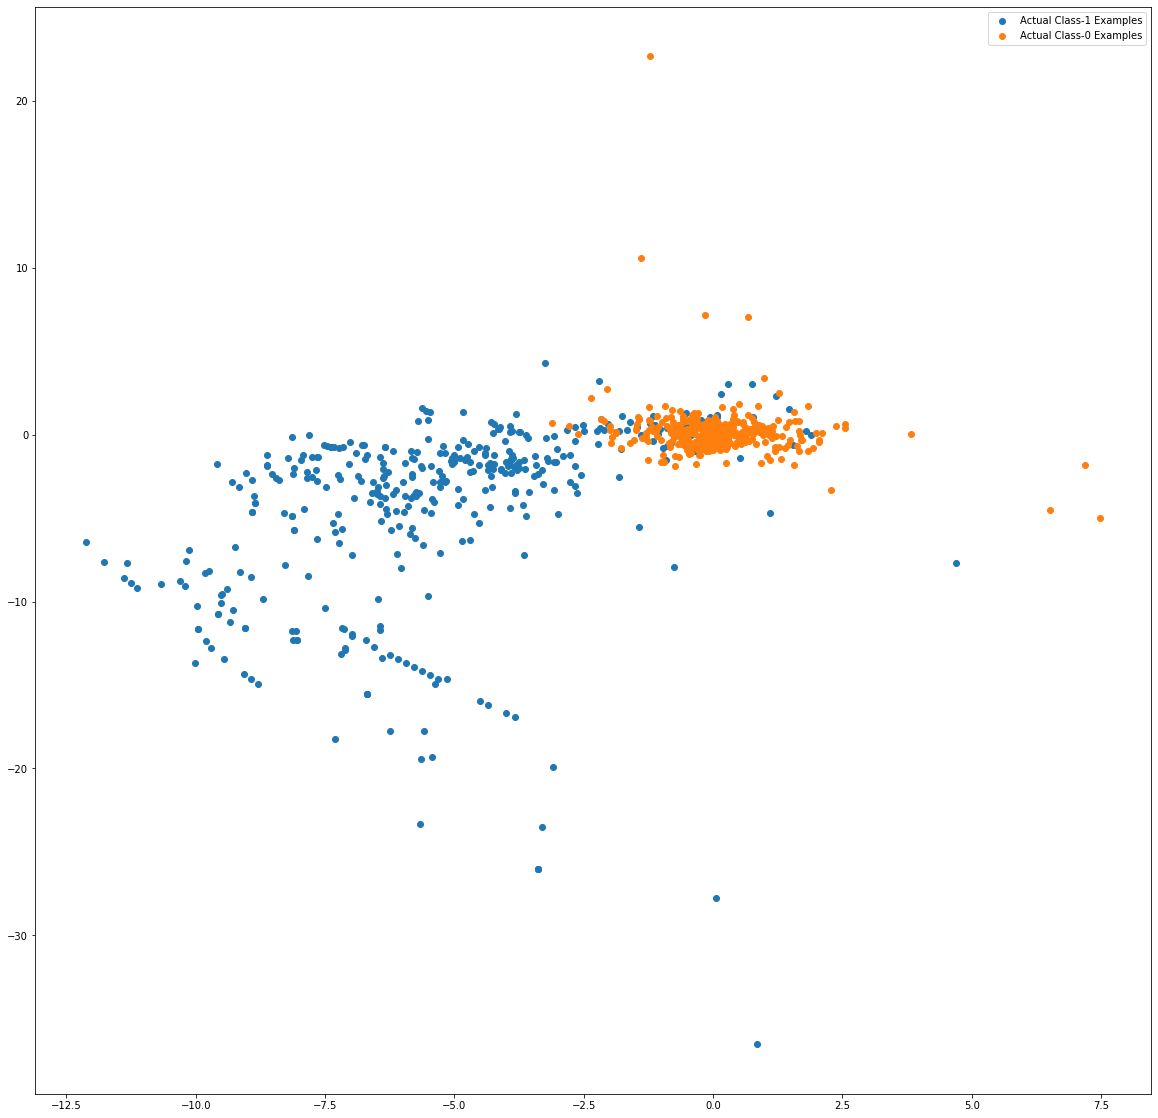

In [62]:
var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [63]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_imb_xgb)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 1.0
Threshold= 0.788678


## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

### Random Oversampling

In [64]:
from imblearn.over_sampling import RandomOverSampler

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [65]:
from collections import Counter
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_over))

Before sampling class distribution:- Counter({0: 227451, 1: 394})
New class distribution:- Counter({0: 227451, 1: 227451})


### 1. Logistic Regrassion with Random Oversampling

In [66]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_over, y_over)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9870556792266398
Best hyperparameters:  {'C': 100}


In [67]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.245417,0.023823,0.0188,0.000400,0.01,{'C': 0.01},0.987391,0.986886,0.987121,0.986910,...,0.986899,0.000400,6,0.986866,0.986883,0.986786,0.986910,0.987116,0.986912,0.000110
1,1.306807,0.082566,0.0196,0.000490,0.1,{'C': 0.1},0.987523,0.987024,0.987268,0.987043,...,0.987040,0.000393,5,0.987006,0.987024,0.986922,0.987045,0.987255,0.987051,0.000110
2,1.331915,0.055450,0.0196,0.000490,1,{'C': 1},0.987536,0.987038,0.987284,0.987057,...,0.987054,0.000394,4,0.987023,0.987041,0.986937,0.987059,0.987271,0.987066,0.000111
3,1.280230,0.038256,0.0194,0.000489,10,{'C': 10},0.987537,0.987040,0.987287,0.987059,...,0.987055,0.000394,3,0.987024,0.987042,0.986939,0.987061,0.987273,0.987068,0.000111
4,1.284707,0.026589,0.0198,0.000400,100,{'C': 100},0.987537,0.987040,0.987287,0.987059,...,0.987056,0.000394,1,0.987024,0.987042,0.986939,0.987061,0.987273,0.987068,0.000111
5,1.309702,0.051359,0.0190,0.000632,1000,{'C': 1000},0.987537,0.987040,0.987287,0.987059,...,0.987056,0.000394,2,0.987024,0.987042,0.986939,0.987061,0.987273,0.987068,0.000111


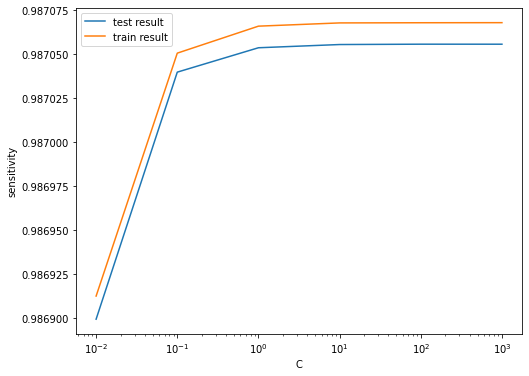

In [68]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### Logistic Regression with hyperparameter tuning

In [69]:
model_cv.best_params_

{'C': 100}

In [70]:
# Instantiating the model
logreg_over = LogisticRegression(C=100)

# Fitting the model with train data
logreg_over_model = logreg_over.fit(X_over, y_over)

#### Evaluating the model on train data

In [71]:
# Predictions on the train set
y_train_pred = logreg_over_model.predict(X_over)

In [72]:
# Printing scores
display_scores(y_over, y_train_pred)

F1 Score: 94.3%
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95    227451
           1       0.97      0.92      0.94    227451

    accuracy                           0.94    454902
   macro avg       0.95      0.94      0.94    454902
weighted avg       0.95      0.94      0.94    454902



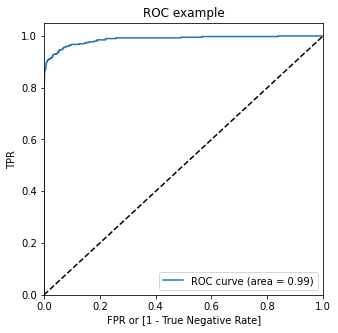

In [73]:
# Predicted probability
y_train_pred_proba = logreg_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
plot_roc(y_over, y_train_pred_proba)

#### Evaluating on test data

In [74]:
# Evaluating on test data
y_test_pred = logreg_over_model.predict(X_test)

# Printing the scores
display_scores(y_test, y_test_pred)

F1 Score: 10.47%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962



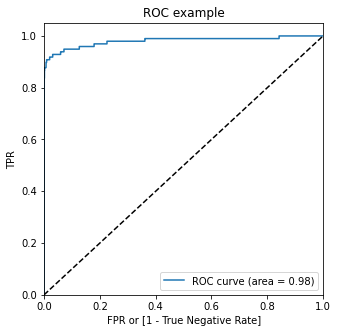

In [75]:
# Predicted probability
y_test_pred_proba = logreg_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
plot_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train set
    - ROC score : 99%
    - F1 score: 94.34%
- Test set
    - ROC score : 98%
    - F1 score: 10.34%

### 2. Decision Tree with Random Oversampling

In [76]:
%%time
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 20, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_over,y_over)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Wall time: 39.4 s


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 20, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [77]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.999717225208839
DecisionTreeClassifier(max_depth=15, min_samples_leaf=50, min_samples_split=50)


#### Decision Tree with optimal hyperparameters

In [78]:
# Model with optimal hyperparameters
dt_over_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=15, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_over_model.fit(X_over, y_over)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

#### Model evatuation on train data

In [79]:
# Predictions on the train set
y_train_pred = dt_over_model.predict(X_over)
display_scores(y_over, y_train_pred)

F1 Score: 99.86%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



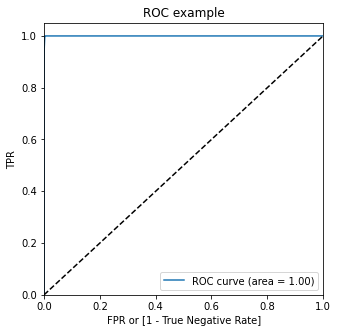

In [80]:
# Predicted probability
y_train_pred_proba = dt_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
plot_roc(y_over, y_train_pred_proba)

#### Predictions on the test set

In [81]:
# Evaluating model on the test data
y_test_pred = dt_over_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 43.02%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.30      0.79      0.43        98

    accuracy                           1.00     56962
   macro avg       0.65      0.89      0.71     56962
weighted avg       1.00      1.00      1.00     56962



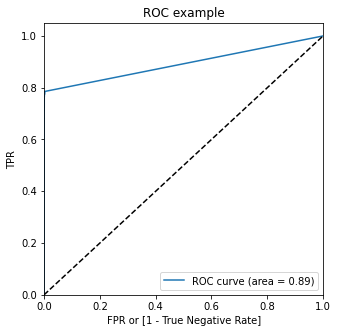

In [82]:
# Predicted probability
y_test_pred_proba = dt_over_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
plot_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train set
    - ROC score : 100%
    - F1 score: 99.86%
- Test set
    - ROC score : 89%
    - F1 score: 43.02%

### 3. XGBoost with Random Oversampling

In [83]:
%%time
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200,eval_metric='logloss',tree_method = "hist")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_over, y_over) 

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Wall time: 44.3 s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
             

In [84]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.985868,0.076351,0.085669,0.002346,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999878,0.999855,0.999858,0.999863,0.000010,4,0.999873,0.999881,0.999891,0.999881,7.201257e-06
1,2.057033,0.103887,0.078169,0.004869,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999860,0.999844,0.999857,0.999854,0.000007,6,0.999863,0.999865,0.999882,0.999870,8.298614e-06
2,2.215544,0.151197,0.092667,0.002495,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999853,0.999860,0.999855,0.999856,0.000003,5,0.999862,0.999868,0.999874,0.999868,5.097298e-06
3,2.050536,0.050234,0.083334,0.006019,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999985,0.999969,0.999975,0.999977,0.000007,2,0.999991,0.999991,0.999990,0.999991,2.533768e-07
4,2.014681,0.070777,0.089667,0.001247,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999974,0.999980,0.999980,0.999978,0.000003,1,0.999994,0.999994,0.999994,0.999994,2.665285e-07
5,1.948836,0.014577,0.084002,0.006377,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999975,0.999982,0.999970,0.999976,0.000005,3,0.999990,0.999993,0.999985,0.999989,3.562376e-06


In [85]:
# Print the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9999780360317075
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='hist', validate_parameters=1, verbosity=None)


In [86]:
# print best params
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

#### XGBoost with optimal hyperparameter

In [87]:
%%time
# run XGB with best hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
xgb_over_model = XGBClassifier(params = params)
xgb_over_model.fit(X_over, y_over)

[10:59:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:59:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 28.3 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

#### Model evatuation on train data

In [88]:
# Predictions on the train set
y_train_pred = xgb_over_model.predict(X_over)

display_scores(y_over, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



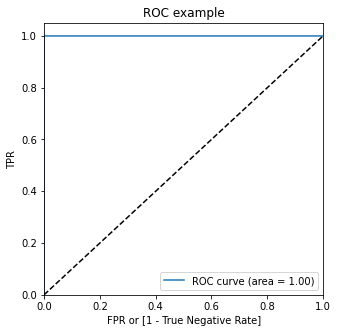

In [89]:
# Predicted probability
y_train_pred_proba = xgb_over_model.predict_proba(X_over)[:,1]

# Plot the ROC curve
plot_roc(y_over, y_train_pred_proba)

#### Model evaluation on the test set

In [90]:
y_pred = xgb_over_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 88.89%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.98      0.82      0.89        98

    accuracy                           1.00     56962
   macro avg       0.99      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



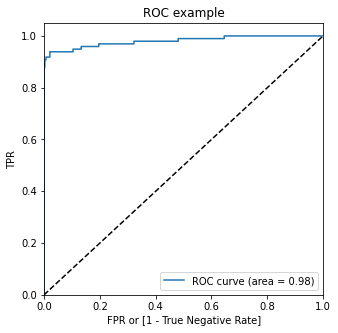

In [91]:
# Predicted probability
y_test_pred_proba = xgb_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
plot_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train set
    - ROC score : 100.0%
    - F1 score: 100.0%
- Test set
    - ROC score : 98%
    - F1 score: 89.13%

### SMOTE (Synthetic Minority Oversampling Technique)

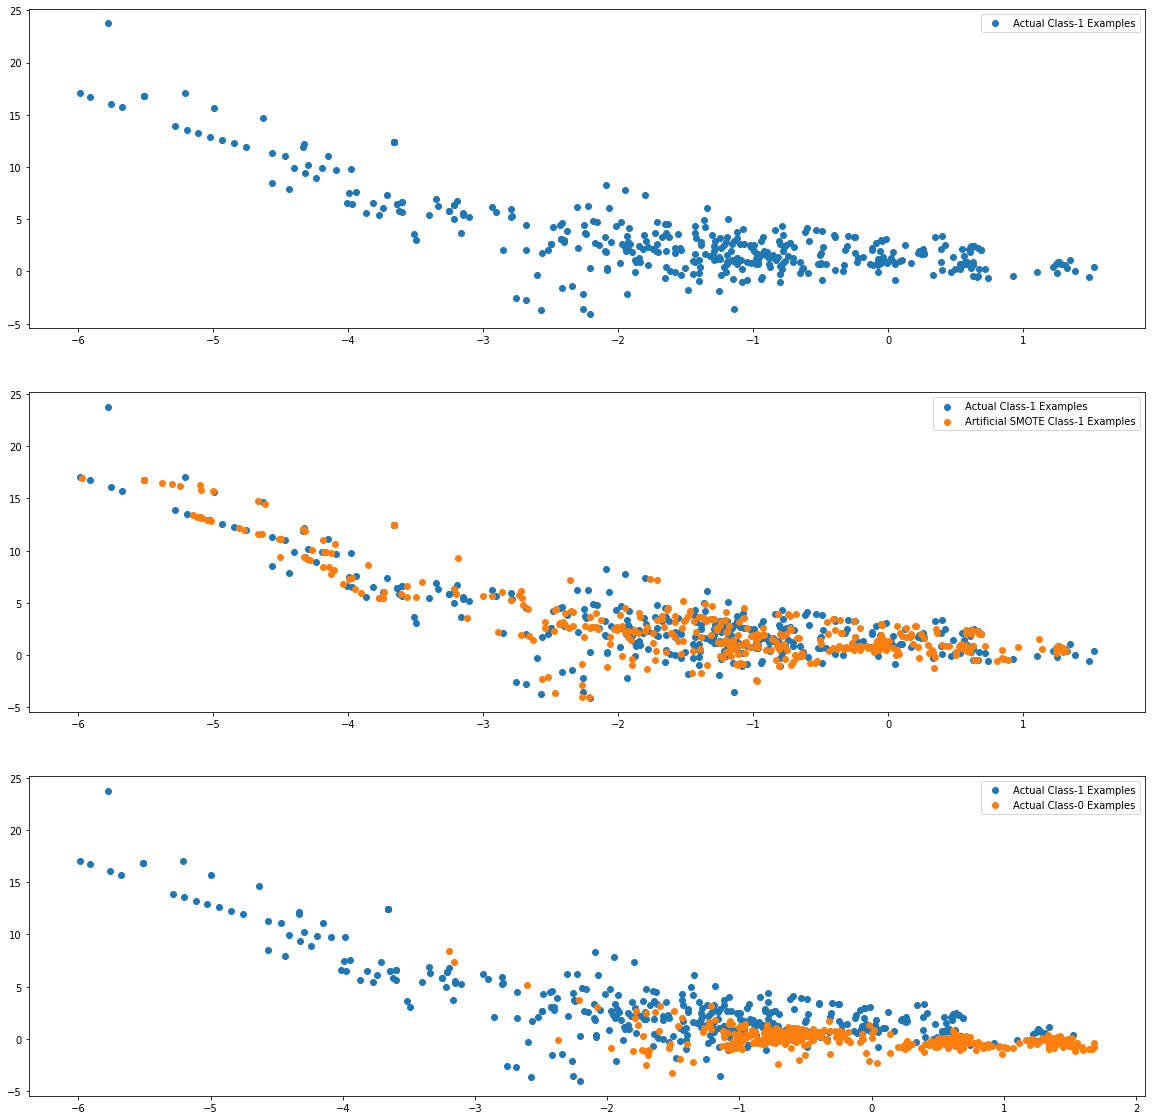

In [92]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()
plt.show()

## Model Building
- Build different models on the balanced dataset and see the result

### 1. Logistic Regression

In [93]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9889852507920895
Best hyperparameters:  {'C': 100}


In [94]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.223145,0.048260,0.020994,0.000622,0.01,{'C': 0.01},0.988651,0.989120,0.989007,0.988704,...,0.988873,0.000177,6,0.988979,0.988788,0.988797,0.988914,0.988955,0.988887,0.00008
1,1.337213,0.114206,0.020193,0.000403,0.1,{'C': 0.1},0.988757,0.989219,0.989093,0.988807,...,0.988974,0.000173,5,0.989079,0.988894,0.988893,0.989012,0.989060,0.988987,0.00008
2,1.372108,0.041956,0.020195,0.000403,1,{'C': 1},0.988768,0.989229,0.989101,0.988817,...,0.988984,0.000172,4,0.989089,0.988905,0.988903,0.989022,0.989071,0.988998,0.00008
3,1.341205,0.030949,0.020418,0.000488,10,{'C': 10},0.988769,0.989230,0.989102,0.988818,...,0.988985,0.000172,3,0.989090,0.988906,0.988905,0.989023,0.989072,0.988999,0.00008
4,1.351504,0.048767,0.020413,0.000481,100,{'C': 100},0.988769,0.989230,0.989102,0.988818,...,0.988985,0.000172,1,0.989090,0.988906,0.988905,0.989023,0.989072,0.988999,0.00008
5,1.379721,0.078531,0.020808,0.000744,1000,{'C': 1000},0.988769,0.989230,0.989102,0.988818,...,0.988985,0.000172,2,0.989090,0.988906,0.988905,0.989023,0.989072,0.988999,0.00008


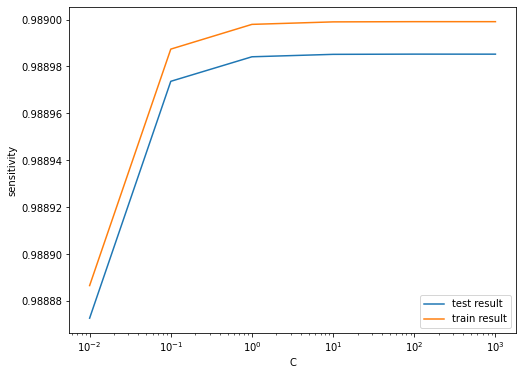

In [95]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='lower right')
plt.xscale('log')

In [96]:
# Printing best params
model_cv.best_params_

{'C': 100}

In [97]:
# creating model with optimal params
lr_smote_model = LogisticRegression(C=100)

# Fitting the model with balanced data
lr_smote_model.fit(X_train_smote, y_train_smote)

LogisticRegression(C=100)

In [98]:
# Evaluating on training data
y_train_pred = lr_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)

F1 Score: 94.23%
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95    227451
           1       0.97      0.92      0.94    227451

    accuracy                           0.94    454902
   macro avg       0.95      0.94      0.94    454902
weighted avg       0.95      0.94      0.94    454902



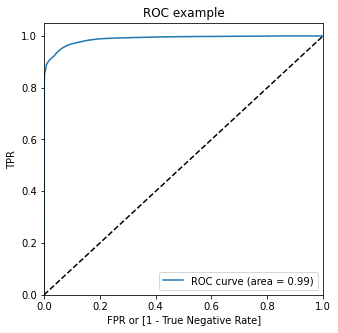

In [99]:
# Predicted probability
y_train_pred_proba_smote = lr_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
plot_roc(y_train_smote, y_train_pred_proba_smote)

In [100]:
# Evaluating on test data
y_test_pred = lr_smote_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 9.7%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



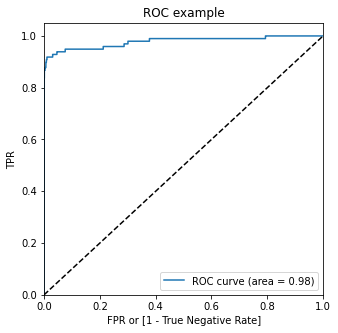

In [101]:
# Predicted probability
y_test_pred_proba_smote = lr_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
plot_roc(y_test, y_test_pred_proba_smote)

#### Model Summary
- Train set
    - ROC score : 99%
    - F1 score: 94.23%
- Test set
    - ROC score : 98%
    - F1 score: 9.7%

### 2. Decision Tree with balanced data using SMOTE

In [102]:
%%time
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 20, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# start grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Wall time: 1min 7s


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 20, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [103]:
# Print the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9988076580818693
DecisionTreeClassifier(max_depth=15, min_samples_leaf=50, min_samples_split=100)


In [104]:
# print best params
grid_search.best_params_

{'max_depth': 15, 'min_samples_leaf': 50, 'min_samples_split': 100}

In [105]:
# Model with optimal hyperparameters
dt_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=15, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [106]:
# Predictions on the train set
y_train_pred_smote = dt_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred_smote)

F1 Score: 99.32%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    227451
           1       0.99      0.99      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



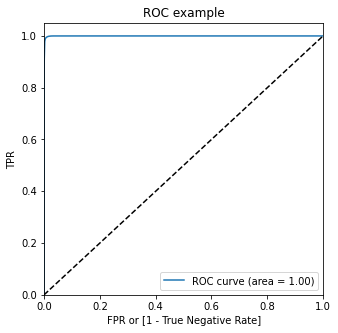

In [107]:
# Predicted probability
y_train_pred_proba = dt_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
plot_roc(y_train_smote, y_train_pred_proba)

In [108]:
# Evaluating model on the test data
y_pred = dt_smote_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 21.45%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.12      0.85      0.21        98

    accuracy                           0.99     56962
   macro avg       0.56      0.92      0.60     56962
weighted avg       1.00      0.99      0.99     56962



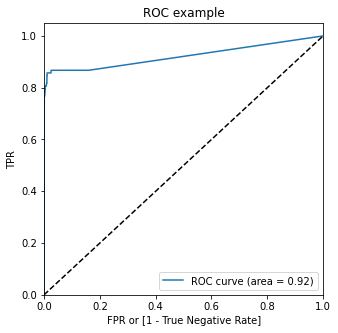

In [109]:
# Predicted probability
y_test_pred_smote = dt_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
plot_roc(y_test, y_test_pred_smote)

#### Model Summary
- Train set
    - ROC score : 100%
    - F1 score: 99.32%
- Test set
    - ROC score : 92%
    - F1 score: 21.45%

### 3. XGBoost with balanced dataset using SMOTE

In [110]:
%%time
# creating a K-Fold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200,eval_metric='logloss',tree_method = "hist")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Wall time: 44 s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
             

In [111]:
# Print optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9999310003781012
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='hist', validate_parameters=1, verbosity=None)


In [112]:
# print best params
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [113]:
# build XGB model with optimal hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_smote_model = XGBClassifier(params = params)
xgb_smote_model.fit(X_train_smote, y_train_smote)

[11:02:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:03:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [114]:
# Predictions on the train set
y_train_pred = xgb_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



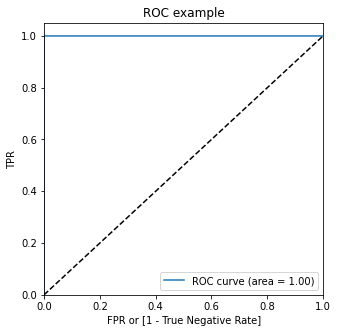

In [115]:
# Predicted probability
y_train_pred_proba = xgb_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
plot_roc(y_train_smote, y_train_pred_proba)

In [116]:
# Predictions on the test set
y_pred = xgb_smote_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 76.65%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.67      0.89      0.77        98

    accuracy                           1.00     56962
   macro avg       0.84      0.94      0.88     56962
weighted avg       1.00      1.00      1.00     56962



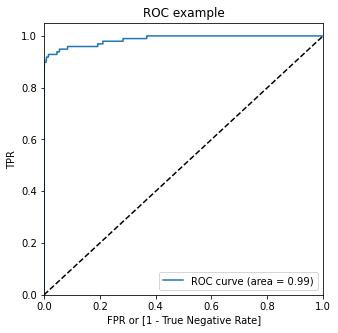

In [117]:
# Predicted probability
y_test_pred_proba = xgb_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
plot_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train set
    - ROC score : 100.0%
    - F1 score: 100.0%
- Test set
    - ROC score : 99%
    - F1 score: 80.95%

### ADASYN (Adaptive Synthetic Sampling)

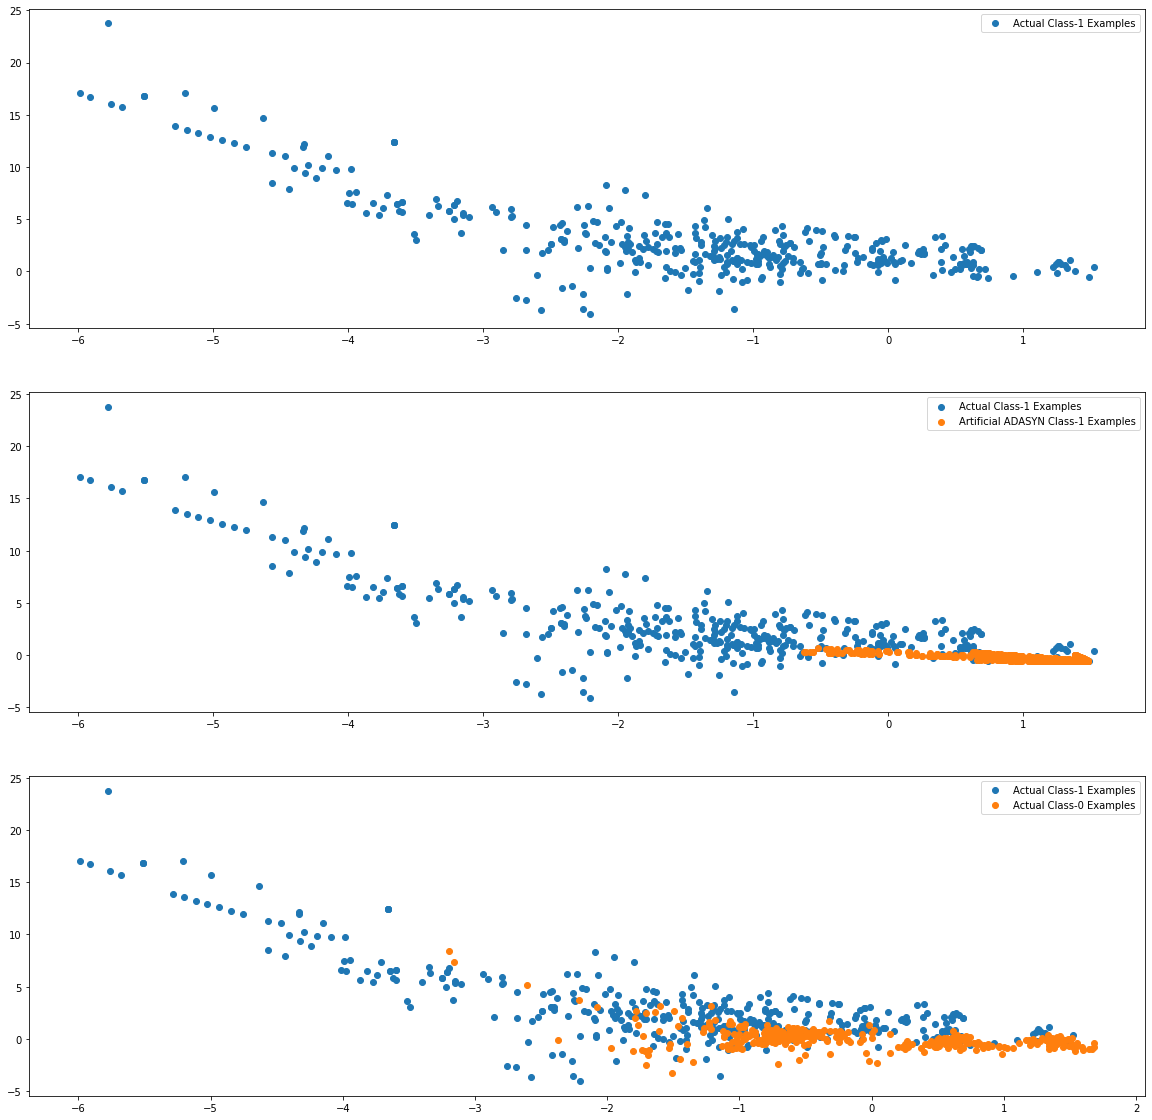

In [118]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### 1. Logistic Regression on balanced dataset using ADASYN

In [119]:
# Creating K-Fold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best ROC AUC score:  0.9616425505885863
Best hyperparameters:  {'C': 1000}


In [120]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.143229,0.049201,0.042323,0.000936,0.01,{'C': 0.01},0.961204,0.961287,0.961636,0.961376,0.000187,6,0.961514,0.961242,0.961433,0.961396,0.000114
1,1.164711,0.120256,0.041646,0.000479,0.1,{'C': 0.1},0.961447,0.961530,0.961883,0.961620,0.000189,5,0.961765,0.961481,0.961674,0.961640,0.000119
2,1.140837,0.064023,0.041655,0.000488,1,{'C': 1},0.961468,0.961550,0.961903,0.961640,0.000188,4,0.961787,0.961501,0.961694,0.961661,0.000119
3,1.115362,0.096624,0.039676,0.000934,10,{'C': 10},0.961470,0.961552,0.961904,0.961642,0.000188,3,0.961789,0.961503,0.961695,0.961662,0.000119
4,1.057542,0.049612,0.039311,0.000465,100,{'C': 100},0.961471,0.961552,0.961904,0.961642,0.000188,2,0.961789,0.961504,0.961696,0.961663,0.000119
5,1.068173,0.076638,0.041019,0.001623,1000,{'C': 1000},0.961471,0.961552,0.961905,0.961643,0.000188,1,0.961789,0.961503,0.961696,0.961663,0.000119


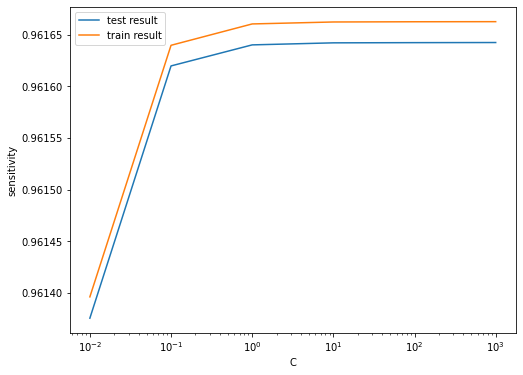

In [121]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [122]:
# model with best params
model_cv.best_params_

{'C': 1000}

In [123]:
# build the model with optimal params
lr_adasyn_model = LogisticRegression(C=1000)

# Fit the training model 
lr_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=1000)

In [124]:
# Evaluating on test data
y_train_pred = lr_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 89.2%
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89    227451
           1       0.90      0.88      0.89    227434

    accuracy                           0.89    454885
   macro avg       0.89      0.89      0.89    454885
weighted avg       0.89      0.89      0.89    454885



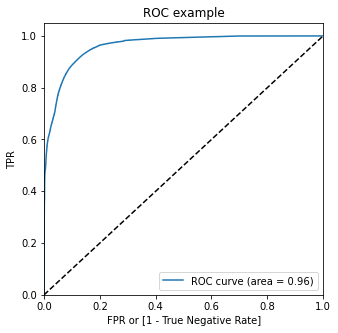

In [125]:
# Predicted probability
y_train_pred_proba = lr_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
plot_roc(y_train_adasyn, y_train_pred_proba)

In [126]:
# Evaluating on test data
y_pred = lr_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 3.21%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.90      0.95     56864
           1       0.02      0.95      0.03        98

    accuracy                           0.90     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.90      0.95     56962



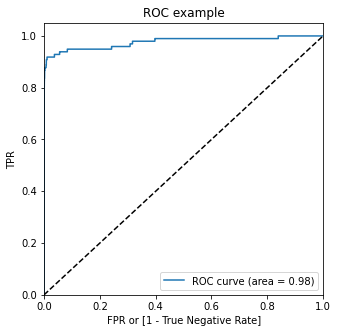

In [127]:
# Predicted probability
y_test_pred_proba = lr_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
plot_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train set
    - ROC score : 96%
    - F1 score: 89.2%
- Test set
    - ROC score : 98%
    - F1 score: 3.23%

### 2. Decision Tree on balanced dataset using ADASYN 

In [128]:
%%time
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 20, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Wall time: 1min 45s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 20, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [129]:
# Print the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.949755290131583
DecisionTreeClassifier(max_depth=15, min_samples_leaf=100, min_samples_split=50)


In [130]:
# Model with optimal hyperparameters
dt_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=15, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

In [131]:
# Evaluating model on the test data
y_train_pred = dt_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 98.57%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99    227451
           1       0.98      0.99      0.99    227434

    accuracy                           0.99    454885
   macro avg       0.99      0.99      0.99    454885
weighted avg       0.99      0.99      0.99    454885



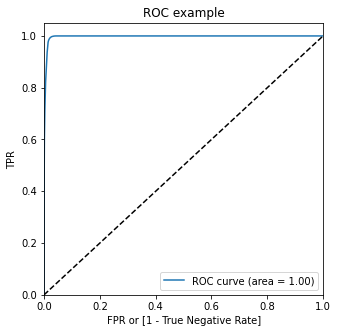

In [132]:
# Predicted probability
y_train_pred_proba = dt_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
plot_roc(y_train_adasyn, y_train_pred_proba)

In [133]:
# Evaluating model on the test data
y_pred = dt_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 12.06%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.88      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



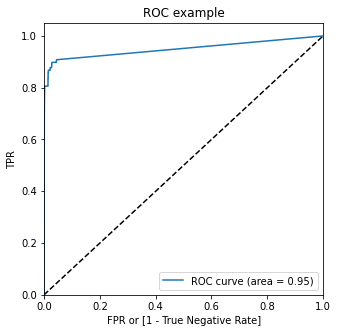

In [134]:
# Predicted probability
y_test_pred_proba = dt_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
plot_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train set
    - ROC score : 100%
    - F1 score: 98.57%
- Test set
    - ROC score : 95%
    - F1 score: 12.06%

### 3. XGBoost on balanced dataset using ADASYN

In [135]:
%%time
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}            


# specify model
xgb_model = XGBClassifier(eval_metric='logloss',tree_method = "hist")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Wall time: 38.7 s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
          

In [136]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.656009,0.002855,0.090334,0.004497,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.995538,0.994039,0.999402,0.996326,0.002259,4,1.0,0.999998,0.999996,0.999998,1.551675e-06
1,1.705867,0.006638,0.104334,0.005907,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.993674,0.995103,0.999595,0.996124,0.002523,6,1.0,0.999999,1.000000,1.000000,3.557916e-07
2,1.710518,0.028186,0.105836,0.008392,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.992666,0.996400,0.999367,0.996144,0.002741,5,1.0,1.000000,1.000000,1.000000,7.171380e-08
3,1.699673,0.093315,0.107000,0.005887,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.995922,0.996830,0.999112,0.997288,0.001342,3,1.0,1.000000,1.000000,1.000000,7.735489e-08
4,1.814674,0.121971,0.099667,0.002055,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.994723,0.998870,0.999758,0.997784,0.002194,2,1.0,1.000000,1.000000,1.000000,0.000000e+00
5,1.711009,0.012094,0.097001,0.006481,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.996876,0.999360,0.999667,0.998634,0.001250,1,1.0,1.000000,1.000000,1.000000,0.000000e+00


In [137]:
# Print the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9986344675985211
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='hist', validate_parameters=1, verbosity=None)


In [138]:
# print best params
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [139]:
# Build the model with optimal params
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.3,
          'max_depth': 6, 
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

# Model with optimal hyperparameter
xgb_adasyn_model = XGBClassifier(params = params,tree_method = "hist")
xgb_adasyn_model.fit(X_train_adasyn,y_train_adasyn)

[11:07:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:07:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1,
              params={'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='hist',
              validate_parameters=1, verbosity=None)

In [140]:
# Predicting on the training set
y_train_pred = xgb_adasyn_model.predict(X_train_adasyn)
# Print the scores
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227434

    accuracy                           1.00    454885
   macro avg       1.00      1.00      1.00    454885
weighted avg       1.00      1.00      1.00    454885



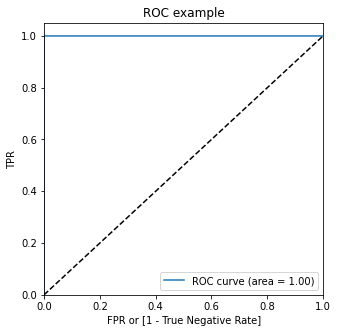

In [141]:
# Predicted probability
y_train_pred_proba = xgb_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
plot_roc(y_train_adasyn, y_train_pred_proba)

In [142]:
# evaluate model on test data
y_pred = xgb_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 80.93%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.89      0.81        98

    accuracy                           1.00     56962
   macro avg       0.87      0.94      0.90     56962
weighted avg       1.00      1.00      1.00     56962



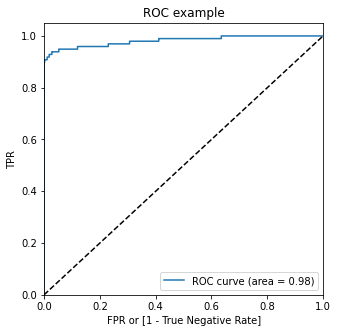

In [143]:
# Predicted probability
y_test_pred_proba = xgb_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
plot_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train set
    - ROC score : 100.0%
    - F1 score: 100.0%
- Test set
    - ROC score : 98%
    - F1 score: 80.93%

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 8


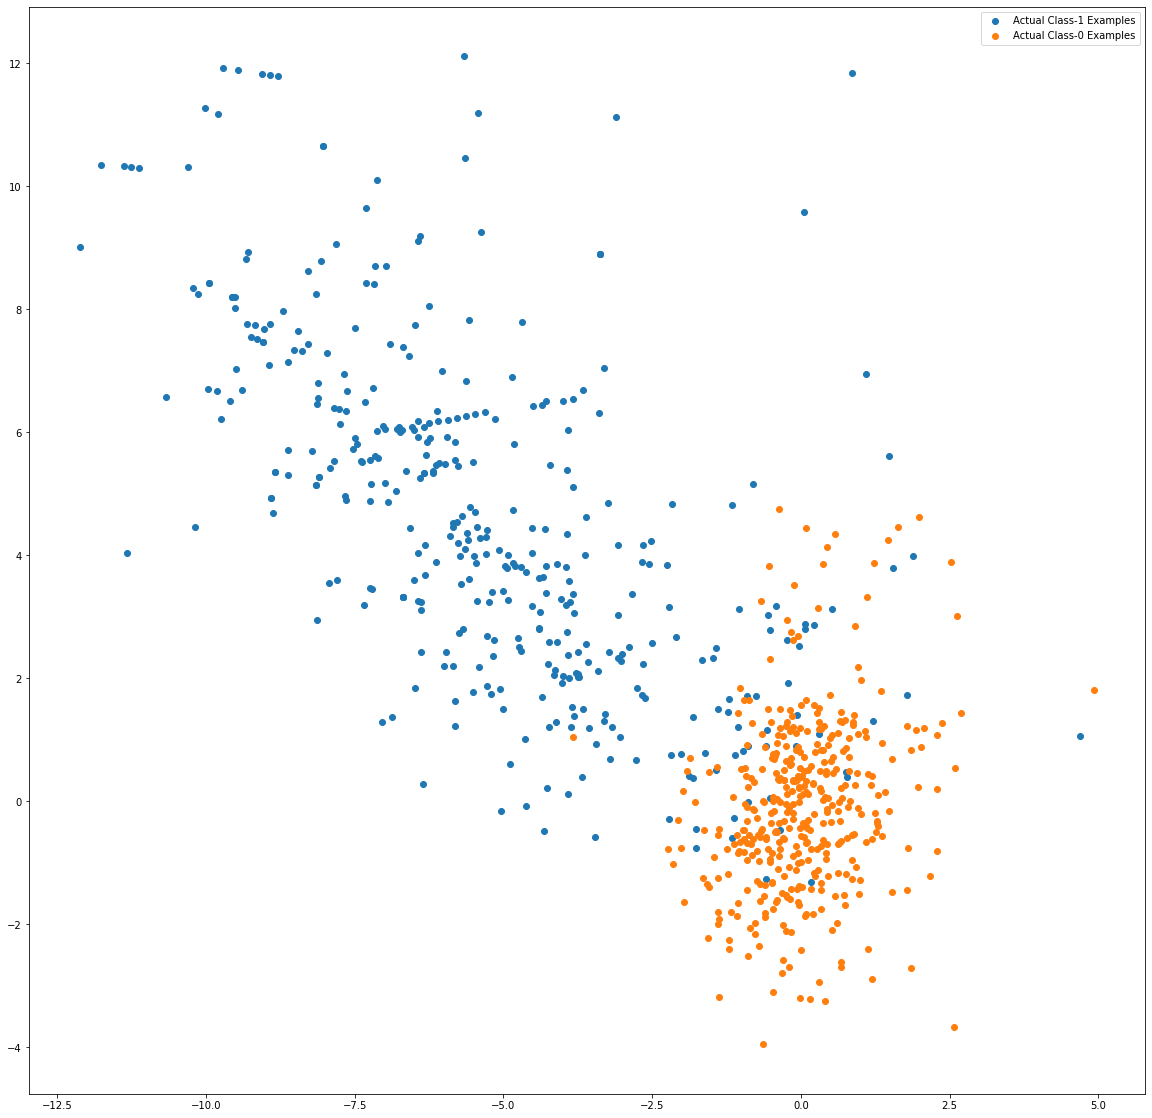

In [144]:
var_imp = []
for i in xgb_adasyn_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### Print the FPR,TPR & select the best threshold from the roc curve

In [145]:
print('Train auc =', metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn, y_train_pred_proba )
threshold = thresholds[np.argmax(tpr-fpr)]
print('Threshold =',threshold)

Train auc = 1.0
Threshold = 0.9223253


We observe that **92.2%** is the threshold value for which TPR is highest and FPR is lowest. We also get **100%** ROC on training data. 

### Summary

We have seen in the above models that we need balanced dataset to predict fraudulent transaction otherwise accuracy might be higher but F1 and AUC-ROC will be less. That is why we have balanced the dataset using three oversampling methods Random Oversampling, SMOTE, ADASYN.

We have also observed that ADASYN works best on all the machine learning models. XGBoost with ADASYN oversampling is the best model which gives us best F1 and ROC-AUC score. This model gives us **ROC of 98%** and **Recall of 89%** on the test data.

- Best Model - XGBoost with ADASYN oversampling
- ROC=98%, Recall=89%